count    200.000000
mean     160.278003
std       25.346462
min       60.500000
25%      140.750000
50%      158.400010
75%      173.700000
max      218.200000
Name: pet, dtype: float64

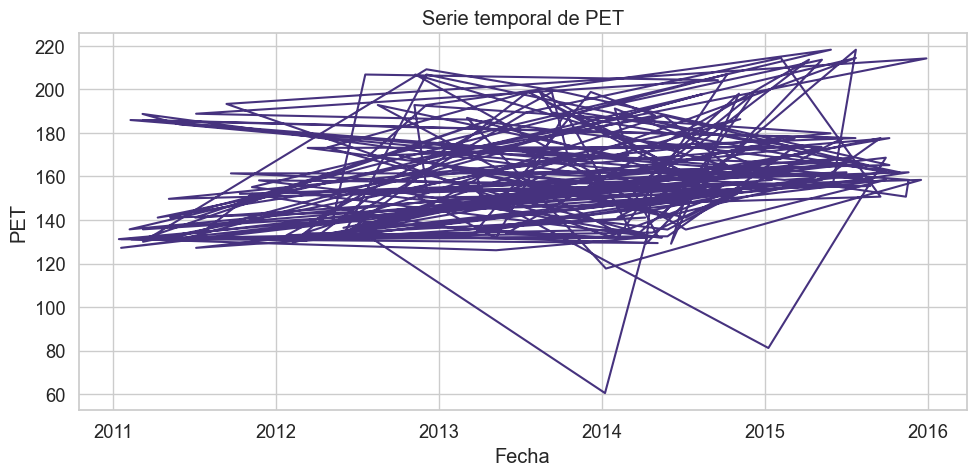

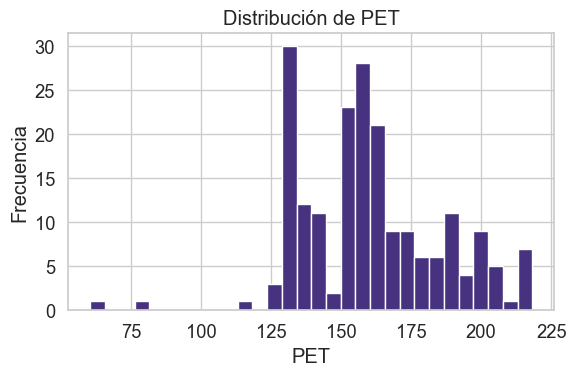

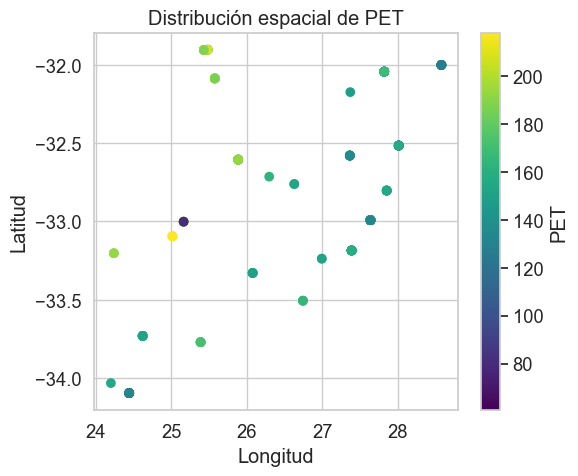

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('terraclimate_features_validation.csv')

# Convert date
df['Sample Date'] = pd.to_datetime(df['Sample Date'], dayfirst=True)

# Basic stats
stats = df['pet'].describe()

# Plot time series
plt.figure(figsize=(10,5))
plt.plot(df['Sample Date'], df['pet'])
plt.title('Serie temporal de PET')
plt.xlabel('Fecha')
plt.ylabel('PET')
plt.tight_layout()
plt.savefig('pet_timeseries.png')

# Histogram
plt.figure(figsize=(6,4))
plt.hist(df['pet'], bins=30)
plt.title('Distribución de PET')
plt.xlabel('PET')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.savefig('pet_histogram.png')

# Scatter geo plot
plt.figure(figsize=(6,5))
plt.scatter(df['Longitude'], df['Latitude'], c=df['pet'], cmap='viridis')
plt.colorbar(label='PET')
plt.title('Distribución espacial de PET')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.tight_layout()
plt.savefig('pet_spatial.png')

stats

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.0 MB/s eta 0:00:11
   -- ------------------------------------- 0.8/11.0 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.0 MB 1.1 MB/s eta 0:00:10
   -- ------------------------------------- 0.8/11.0 MB 1.1 MB/s eta 0:00:10
   --- ------------------------------------ 1.0/11.0 MB 679.3 kB/s eta 0:00:15
   ---- ----------------------------------- 1.3/11.0 MB 757.9 kB/s eta 0:00:13
   ----- ---------------------------------- 1.6/11.0 MB 793.9 kB/s eta 0:00:12
   ------ --------------------------------- 1.8/11.0 MB 841.3 kB/s eta 0:00:11
   ------- -------------------------------- 2.1/11.0 MB 891.2 kB/s eta 0:00:10
   -------- ------------------------------- 2.4/11.0 MB 901.8 kB/s eta 0:00:10
   -----

C:\Users\DH898GW\AppData\Local\anaconda3\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\DH898GW\AppData\Local\anaconda3\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\DH898GW\AppData\Local\anaconda3\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\DH898GW\AppData\Local\anaconda3\Lib\site-packages\cartopy\io\__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


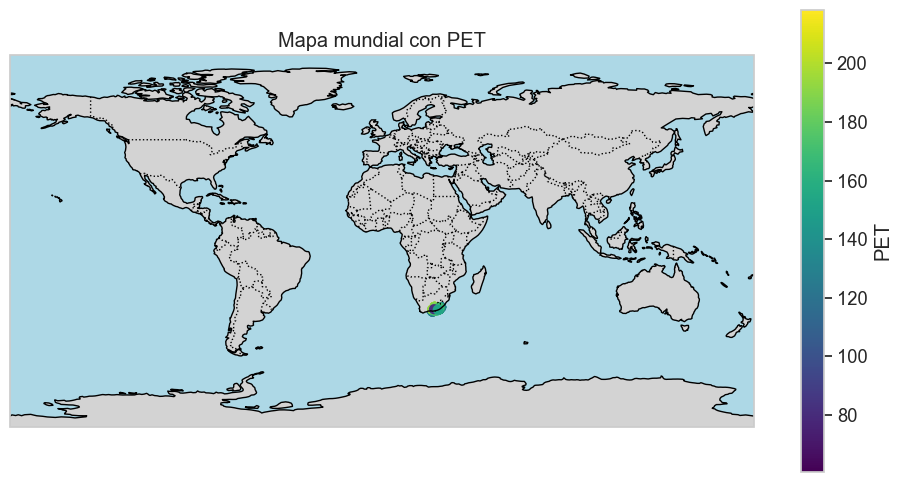

In [5]:
!pip install cartopy
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

df = pd.read_csv('terraclimate_features_validation.csv')

lons = df['Longitude']
lats = df['Latitude']
vals = df['pet']

fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=":")

sc = ax.scatter(lons, lats, c=vals, cmap='viridis', s=40, transform=ccrs.PlateCarree())
plt.colorbar(sc, label='PET')

plt.title('Mapa mundial con PET')
plt.savefig('world_pet_map.png')
plt.show()

In [6]:
# ============================================================
# MAPA DE TERRACLIMATE BASADO EN PET (Evapotranspiración Potencial)
# ============================================================

import pandas as pd
import folium

# --- 1. Cargar dataset --------------------------------------

df = pd.read_csv("terraclimate_features_validation.csv")
df["Sample Date"] = pd.to_datetime(df["Sample Date"], dayfirst=True, errors="coerce")

# --- 2. Función de colores según niveles de PET -------------

def color_por_pet(value):
    """
    Escala simple para visualizar la intensidad del PET:
    <140      = Bajo (verde)
    140–160   = Medio (amarillo)
    160–180   = Alto (naranja)
    >180      = Muy alto (rojo)
    """
    if value < 140:
        return "green"
    elif value < 160:
        return "yellow"
    elif value < 180:
        return "orange"
    else:
        return "red"

# --- 3. Crear mapa centrado en el dataset --------------------

lat_center = df["Latitude"].mean()
lon_center = df["Longitude"].mean()

m = folium.Map(location=[lat_center, lon_center], zoom_start=5)

# --- 4. Agregar puntos coloreados por PET ---------------------

for _, row in df.iterrows():
    valor = row["pet"]
    color = color_por_pet(valor)

    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=(
            f"<b>PET:</b> {valor}<br>"
            f"<b>Fecha:</b> {row['Sample Date'].date()}"
        )
    ).add_to(m)

# --- 5. Agregar leyenda --------------------------------------

legend_html = """
<div style="
    position: fixed;
    bottom: 30px; left: 30px; width: 200px; height: 150px;
    background-color: white; z-index:9999;
    font-size:14px; border:2px solid grey; border-radius:8px; padding:10px;
">
<b>Niveles de PET</b><br>
<i style="background:green; width:10px; height:10px; display:inline-block;"></i> Bajo (&lt;140)<br>
<i style="background:yellow; width:10px; height:10px; display:inline-block;"></i> Medio (140–160)<br>
<i style="background:orange; width:10px; height:10px; display:inline-block;"></i> Alto (160–180)<br>
<i style="background:red; width:10px; height:10px; display:inline-block;"></i> Muy alto (&gt;180)<br>
</div>
"""

m.get_root().html.add_child(folium.Element(legend_html))

# --- 6. Guardar mapa -----------------------------------------

m.save("mapa_pet_terraclimate.html")
print("Mapa guardado como 'mapa_pet_terraclimate.html'")

Mapa guardado como 'mapa_pet_terraclimate.html'
